<a href="https://colab.research.google.com/github/satishgc227/git-test/blob/master/OTTO_RECOMMENDER_SYSTEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task overview :
The aim of this competition is to predict e-commerce clicks, cart additions, and orders. You'll build a multi-objective recommender system based on previous events in a user session.

Current recommender systems consist of various models with different approaches, ranging from simple matrix factorization to a transformer-type deep neural network. However, no single model exists that can simultaneously optimize multiple objectives. In this competition, you’ll build a single entry to predict click-through, add-to-cart, and conversion rates based on previous same-session events.

Import libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

In [2]:
#!pip install zipfile36

In [3]:
# if sys.version_info >= (3, 6):
#     import zipfile
# else:
#     import zipfile36 as zipfile


# file_name="otto-recommender-system.zip"

In [4]:
# # opening the zip file in READ mode
# with zipfile(file_name, 'r') as zip:
#     # printing all the contents of the zip file
#     zip.printdir()
  
#     # extracting all the files
#     print('Extracting all the files now...')
#     zip.extractall()
#     print('Done!')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df=pd.read_csv("/content/traian csv.csv")

In [7]:
df

,session,aid,ts,type
0,8000000,766953.0,1.660420e+12,clicks
1,8000000,1586093.0,1.660420e+12,clicks
2,8000000,1586093.0,1.660420e+12,clicks
3,8000000,682970.0,1.660420e+12,clicks
4,8000000,799794.0,1.660420e+12,clicks
...,...,...,...,...
356687,8033385,1074359.0,1.660850e+12,clicks
356688,8033385,1234452.0,1.660850e+12,clicks
356689,8033385,1074359.0,1.660850e+12,clicks
356690,8033385,1234452.0,1.660850e+12,clicks


Data preprocessing:

In [8]:
df.isnull().sum()

session    0
aid        1
ts         1
type       1
dtype: int64

In [9]:
df.dropna()

,session,aid,ts,type
0,8000000,766953.0,1.660420e+12,clicks
1,8000000,1586093.0,1.660420e+12,clicks
2,8000000,1586093.0,1.660420e+12,clicks
3,8000000,682970.0,1.660420e+12,clicks
4,8000000,799794.0,1.660420e+12,clicks
...,...,...,...,...
356686,8033385,1074359.0,1.660850e+12,clicks
356687,8033385,1074359.0,1.660850e+12,clicks
356688,8033385,1234452.0,1.660850e+12,clicks
356689,8033385,1074359.0,1.660850e+12,clicks


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356692 entries, 0 to 356691
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   session  356692 non-null  int64  
 1   aid      356691 non-null  float64
 2   ts       356691 non-null  float64
 3   type     356691 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 10.9+ MB


In [11]:
# import json
# f=open("/content/test.jsonl")
# chunks=f.read()
# chunks

In [12]:
#print(chunks)

In [13]:
# import pandas as pd
# import json
# import glob
# from pandas.io.json import json_normalize

# json_files = glob.glob("*.json")
# dfs = []
# for file in json_files:
#     with open("/content/test.jsonl") as f:
#         for line in f.readlines():
#             df = pd.json_normalize(json.loads(line))
#             list_= ['','Item.metadata.M.timestamp.S','Item.sensor.M.celcius.N','Item.sensor.M.water.N']
#             df = df.loc[:, df.columns.isin(list_)]
#             dfs.append(df)
# df_combine = pd.concat(dfs, sort=False)
# df_combine.to_csv('json_to_raw.csv',index= None)

In [14]:
# import zipfile
# from google.colab import drive

# drive.mount('/content/drive/')

# zip_ref = zipfile.ZipFile("/content/drive/Othercomputers/My Laptop/Downloads/train.jsonl.zip", 'r')
# zip_ref.extractall("/content/drive/Othercomputers/My Laptop/Downloads/tmp")
# zip_ref.close()

In [15]:
# import json
# dd=open("/content/drive/Othercomputers/My Laptop/Downloads/tmp/train.jsonl")

In [16]:
# import pandas as pd
# chunks=pd.read_json(dd,lines=True, chunksize=1000)

In [17]:
#fg=pd.DataFrame(chunks)

In [18]:
df.shape

(356692, 4)

In [19]:
df['session'].unique()


array([8000000, 8000001, 8000002, ..., 8033384, 8033385,    8033])

In [20]:
df.session.unique().shape

(33387,)

In [21]:
s=df.groupby('session')['aid','ts','type'].count()
print(s)

         aid  ts  type
session               
8033       0   0     0
8000000    6   6     6
8000001    2   2     2
8000002    7   7     7
8000003    5   5     5
...      ...  ..   ...
8033381    7   7     7
8033382    3   3     3
8033383    5   5     5
8033384   16  16    16
8033385   43  43    43

[33387 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [22]:
df.ts

0         1.660420e+12
1         1.660420e+12
2         1.660420e+12
3         1.660420e+12
4         1.660420e+12
              ...     
356687    1.660850e+12
356688    1.660850e+12
356689    1.660850e+12
356690    1.660850e+12
356691             NaN
Name: ts, Length: 356692, dtype: float64

In [23]:
import datetime
d=df['ts'].max()
f=df['ts'].min()
f

1660420000000.0

In [24]:
datetime.datetime.fromtimestamp(f/1000),datetime.datetime.fromtimestamp(d/1000)

(datetime.datetime(2022, 8, 13, 19, 46, 40),
 datetime.datetime(2022, 8, 28, 20, 53, 20))

In [25]:
df['ts'].values

array([1.66042e+12, 1.66042e+12, 1.66042e+12, ..., 1.66085e+12,
       1.66085e+12,         nan])

In [26]:
df['ts'].values[0]

1660420000000.0

In [27]:
session_duration = df.groupby('session').apply(lambda x: (x['ts'].values[-1] - x['ts'].values[0])/(1000*60*60))
session_duration.max()

361.1111111111111

Let's convert timestamp to the readable time:

In [28]:
df['ts']=pd.to_datetime(df['ts'])

In [29]:
b=df['ts']

In [30]:
print(f'Years:{b.dt.year.unique()} , \n Months"{b.dt.month.unique()}, \n Days:{b.dt.day.unique()} ')

Years:[1970.   nan] , 
 Months"[ 1. nan], 
 Days:[ 1. nan] 


In [31]:
df['ts_conv']=b


In [32]:
df_grouped= df.groupby('session')['ts_conv'].agg([min,max])

In [33]:
df_grouped['diff']=df_grouped['max']-df_grouped['min']

In [34]:
df_grouped['diff']

session
8033                         NaT
8000000          0 days 00:00:00
8000001   0 days 00:00:00.680000
8000002          0 days 00:00:00
8000003   0 days 00:00:00.950000
                   ...          
8033381   0 days 00:00:00.560000
8033382   0 days 00:00:01.120000
8033383   0 days 00:00:00.660000
8033384   0 days 00:00:00.850000
8033385   0 days 00:00:00.430000
Name: diff, Length: 33387, dtype: timedelta64[ns]

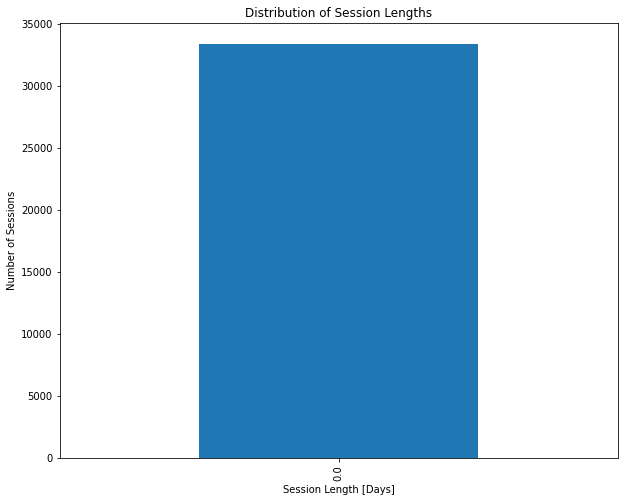

In [35]:
df_grouped['diff'].dt.days.sort_values().value_counts().plot(kind='bar', figsize=(10,8), title='Distribution of Session Lengths')
plt.xlabel('Session Length [Days]')
plt.ylabel('Number of Sessions')
plt.show()

In [36]:
idx_0=df_grouped.query('diff.dt.days==0').index.to_list()

In [37]:
# ind_0

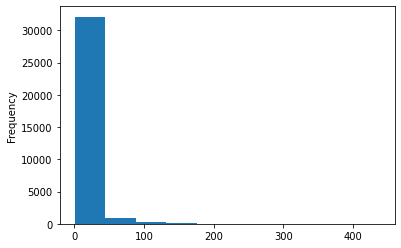

In [38]:
import matplotlib.pyplot as plt


df.groupby('session').size().plot.hist()


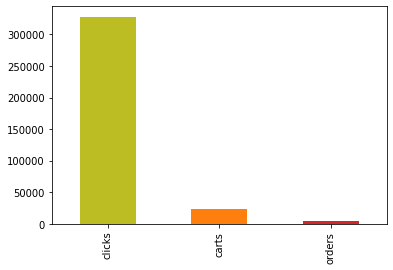

In [39]:
colors = ['tab:olive', 'tab:orange', 'tab:red']


df.query('session in @idx_0').type.value_counts(normalize=False).plot(kind='bar', color=colors)


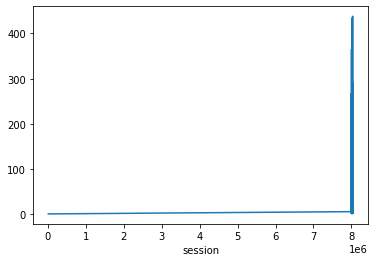

In [40]:
df.groupby('session').size().plot()

Let us find the last actions in a session:


In [41]:
list_last = [i[-1] for i in df.groupby('session').agg({'type' : lambda x: list(x)}).type.to_list()]


In [42]:
list_all = [item for sublist in df.groupby('session').agg({'type': lambda x: list(x)}).type.to_list() for item in sublist]   

Let's see how likely the session ends with order :


In [43]:
list_all.count('clicks'),list_all.count('orders'),list_all.count('carts')

(327658, 5342, 23691)

In [44]:
for i in ['clicks','orders','carts']:
  print(f'it is {np.round((list_last.count(i)*len(list_all))/(list_all.count(i)*len(list_last)),1)} likely that the last actions were {i}')


it is 1.0 likely that the last actions were clicks
it is 1.6 likely that the last actions were orders
it is 0.5 likely that the last actions were carts


Hence it is likely that the session ends with half probability of carts but twice as that of orders.

Building an LSTM to predict the future aids:

In [45]:
df.aid.nunique()


133928

In [46]:
#shuffling in order to prevent any correlation between new labels and outcome :


In [47]:
ids=np.arange(df.aid.nunique())

In [48]:
ids

array([     0,      1,      2, ..., 133925, 133926, 133927])

In [49]:
np.random.shuffle(ids)

In [50]:
#mapping article id to integer encoding

In [51]:
map_aid={i:j for i,j in zip(df.aid.unique(),ids)}

In [52]:
#map_aid

In [53]:
df['aid_id']=df['aid'].map(map_aid)

In [54]:
df.head()

,session,aid,ts,type,ts_conv,aid_id
0,8000000,766953.0,1970-01-01 00:27:40.420,clicks,1970-01-01 00:27:40.420,22324.0
1,8000000,1586093.0,1970-01-01 00:27:40.420,clicks,1970-01-01 00:27:40.420,46299.0
2,8000000,1586093.0,1970-01-01 00:27:40.420,clicks,1970-01-01 00:27:40.420,46299.0
3,8000000,682970.0,1970-01-01 00:27:40.420,clicks,1970-01-01 00:27:40.420,81777.0
4,8000000,799794.0,1970-01-01 00:27:40.420,clicks,1970-01-01 00:27:40.420,86585.0


In [55]:
#Grouping the train data by session:

In [56]:
df_train= df.groupby('session').agg({'aid_id': lambda x : list(x)})

In [57]:
#let us now consider with only less than or equal 20 aids

In [58]:
df_train = df_train[df_train.aid_id.map(len) <= 20]

In [59]:
df_train.head()

,aid_id
session,
8033,[nan]
8000000,"[22324.0, 46299.0, 46299.0, 81777.0, 86585.0, ..."
8000001,"[38110.0, 38110.0]"
8000002,"[69106.0, 69433.0, 76273.0, 88278.0, 16992.0, ..."
8000003,"[113968.0, 71037.0, 38277.0, 38377.0, 110505.0]"


In [86]:
#Padding to make all lists of same size

In [61]:
length = max(map(len,df_train.aid_id))

In [62]:
 X=np.asarray([[0]*(length-len(xi))+ xi for xi in df_train.aid_id])

In [63]:
X

array([[     0.,      0.,      0., ...,      0.,      0.,     nan],
       [     0.,      0.,      0., ...,  81777.,  86585.,  46299.],
       [     0.,      0.,      0., ...,      0.,  38110.,  38110.],
       ...,
       [     0.,      0.,      0., ...,  56058.,  10420., 127399.],
       [     0.,      0.,      0., ...,  81674.,  91138.,  81674.],
       [     0.,      0.,      0., ...,  11675.,  11675.,  11675.]])

In [64]:
#Train - test split

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train , X_val ,y_train , y_val =train_test_split(X[:,:-1],X[:,-1] ,test_size=0.3 , random_state = 43)

In [67]:
X_train.shape,X_val.shape , y_train.shape , y_val.shape

((20539, 19), (8803, 19), (20539,), (8803,))

In [68]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.keras.layers import dense

In [69]:
 from keras.models import Sequential

Basic bidirectional LSTM architecture : 

In [70]:
model=Sequential()
model.add(layers.Embedding(df.aid.nunique(),20, input_length=X_train.shape[1]))
model.add(layers.Bidirectional(layers.LSTM(64,dropout=0.2)))
model.add(layers.Dense(1,activation='softmax'))

In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 19, 20)            2678560   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              43520     
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,722,209
Trainable params: 2,722,209
Non-trainable params: 0
_________________________________________________________________


In [72]:
from tensorflow.keras.optimizers import RMSprop,Adam
optimizer=Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer , metrics=['accuracy'])

In [87]:
history= model.fit(X_train ,y_train ,epochs=3, validation_data=(X_val,y_val),batch_size=1000)

Epoch 1/3


ValueError: ignored

In [74]:
df = df[['session','type','aid']]

In [75]:
#df.set_index('session',inplace=True)

In [76]:
df

,session,type,aid
0,8000000,clicks,766953.0
1,8000000,clicks,1586093.0
2,8000000,clicks,1586093.0
3,8000000,clicks,682970.0
4,8000000,clicks,799794.0
...,...,...,...
356687,8033385,clicks,1074359.0
356688,8033385,clicks,1234452.0
356689,8033385,clicks,1074359.0
356690,8033385,clicks,1234452.0


In [77]:
df.rename({'type': ' types'},axis= 1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [78]:
df.replace({'clicks':1 , 'carts' : 2 , 'orders':3},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [79]:
# session2id={o:i for o,i in enumerate(sessions)}
# type2id = {o:i for o,i in enumerate(types)}


In [80]:
df.drop('aid',axis=1)

,session,types
0,8000000,1.0
1,8000000,1.0
2,8000000,1.0
3,8000000,1.0
4,8000000,1.0
...,...,...
356687,8033385,1.0
356688,8033385,1.0
356689,8033385,1.0
356690,8033385,1.0


In [81]:
df['aid']

0          766953.0
1         1586093.0
2         1586093.0
3          682970.0
4          799794.0
            ...    
356687    1074359.0
356688    1234452.0
356689    1074359.0
356690    1234452.0
356691          NaN
Name: aid, Length: 356692, dtype: float64

In [82]:
X_train , X_val ,y_train , y_val =train_test_split(df.drop('aid',axis=1),df['aid'] ,test_size=0.3 , random_state = 43)

In [83]:
#Creating an embedding layer for session

from keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model



In [85]:
n_session=len(df['session'].unique())
n_type=len(df['types'].unique())

n_latent_factors=10

KeyError: ignored

In [ ]:
session_input=Input(shape=(1,),name='session_input')
session_embedding=Embedding(n_session,n_latent_factors,name='session_embedding')(session_input)
session_vec=Flatten(name='session_flatten')(session_embedding)

In [ ]:
type_input=Input(shape=(1,),name='type_input')
type_embedding=Embedding(n_type,n_latent_factors,name='type_embedding')(type_input)
type_vec=Flatten(name='type_flatten')(type_embedding)

In [ ]:
from keras.layers import dot

In [ ]:
# concatenate features
  sim=dot([session_vec,type_vec],name='Simalarity-Dot-Product',axes=1)
#model =keras.models.Model([session_input, type_input],sim)


In [ ]:
# Create model and compile it

#model.compile(optimizer=Adam(lr=1e-4),loss='mse')

In [ ]:
#history = model2.fit([df.session, df.types], df.aid, epochs=1)


In [ ]:
nn_inp=Dense(96,activation='relu')(sim)
nn_inp=Dropout(0.4)(nn_inp)
# nn_inp=BatchNormalization()(nn_inp)
nn_inp=Dense(1,activation='relu')(nn_inp)
nn_model =keras.models.Model([session_input, _input],nn_inp)
nn_model.summary()